In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [62]:
with open('/content/cricket_wc_match_results.json') as f:
    data = json.load (f)
data

[{'matchSummary': [{'team1': 'Namibia',
    'team2': 'Sri Lanka',
    'winner': 'Namibia',
    'margin': '55 runs',
    'ground': 'Geelong',
    'matchDate': 'Oct 16, 2022',
    'scorecard': 'T20I # 1823'},
   {'team1': 'Netherlands',
    'team2': 'U.A.E.',
    'winner': 'Netherlands',
    'margin': '3 wickets',
    'ground': 'Geelong',
    'matchDate': 'Oct 16, 2022',
    'scorecard': 'T20I # 1825'},
   {'team1': 'Scotland',
    'team2': 'West Indies',
    'winner': 'Scotland',
    'margin': '42 runs',
    'ground': 'Hobart',
    'matchDate': 'Oct 17, 2022',
    'scorecard': 'T20I # 1826'},
   {'team1': 'Ireland',
    'team2': 'Zimbabwe',
    'winner': 'Zimbabwe',
    'margin': '31 runs',
    'ground': 'Hobart',
    'matchDate': 'Oct 17, 2022',
    'scorecard': 'T20I # 1828'},
   {'team1': 'Namibia',
    'team2': 'Netherlands',
    'winner': 'Netherlands',
    'margin': '5 wickets',
    'ground': 'Geelong',
    'matchDate': 'Oct 18, 2022',
    'scorecard': 'T20I # 1830'},
   {'team1':

In [63]:
len(data)

1

In [64]:
data[0]['matchSummary']

[{'team1': 'Namibia',
  'team2': 'Sri Lanka',
  'winner': 'Namibia',
  'margin': '55 runs',
  'ground': 'Geelong',
  'matchDate': 'Oct 16, 2022',
  'scorecard': 'T20I # 1823'},
 {'team1': 'Netherlands',
  'team2': 'U.A.E.',
  'winner': 'Netherlands',
  'margin': '3 wickets',
  'ground': 'Geelong',
  'matchDate': 'Oct 16, 2022',
  'scorecard': 'T20I # 1825'},
 {'team1': 'Scotland',
  'team2': 'West Indies',
  'winner': 'Scotland',
  'margin': '42 runs',
  'ground': 'Hobart',
  'matchDate': 'Oct 17, 2022',
  'scorecard': 'T20I # 1826'},
 {'team1': 'Ireland',
  'team2': 'Zimbabwe',
  'winner': 'Zimbabwe',
  'margin': '31 runs',
  'ground': 'Hobart',
  'matchDate': 'Oct 17, 2022',
  'scorecard': 'T20I # 1828'},
 {'team1': 'Namibia',
  'team2': 'Netherlands',
  'winner': 'Netherlands',
  'margin': '5 wickets',
  'ground': 'Geelong',
  'matchDate': 'Oct 18, 2022',
  'scorecard': 'T20I # 1830'},
 {'team1': 'Sri Lanka',
  'team2': 'U.A.E.',
  'winner': 'Sri Lanka',
  'margin': '79 runs',
  'gr

In [65]:
# converting into pandas data_match
data_match = pd.DataFrame(data[0]['matchSummary'])
data_match.head()

,team1,team2,winner,margin,ground,matchDate,scorecard
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [66]:
print(data_match.columns)


Index(['team1', 'team2', 'winner', 'margin', 'ground', 'matchDate',
       'scorecard'],
      dtype='object')


In [67]:
data_match.rename(columns={'scorecard': 'match_id',}, inplace=True)
data_match.head()
#data_match.columns = data_match.columns.str.strip()

,team1,team2,winner,margin,ground,matchDate,match_id
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [68]:
match_ids_dict = {}

for index, row in data_match.iterrows():
    key1 = row['team1'] + 'Vs' + row['team2']
    key2 = row['team2'] + 'Vs' + row['team1']

    match_ids_dict[key1]= row["match_id"]  # Fixed indentation here
    match_ids_dict[key2]= row["match_id"]  # And here

match_ids_dict

{'NamibiaVsSri Lanka': 'T20I # 1823',
 'Sri LankaVsNamibia': 'T20I # 1823',
 'NetherlandsVsU.A.E.': 'T20I # 1825',
 'U.A.E.VsNetherlands': 'T20I # 1825',
 'ScotlandVsWest Indies': 'T20I # 1826',
 'West IndiesVsScotland': 'T20I # 1826',
 'IrelandVsZimbabwe': 'T20I # 1828',
 'ZimbabweVsIreland': 'T20I # 1828',
 'NamibiaVsNetherlands': 'T20I # 1830',
 'NetherlandsVsNamibia': 'T20I # 1830',
 'Sri LankaVsU.A.E.': 'T20I # 1832',
 'U.A.E.VsSri Lanka': 'T20I # 1832',
 'IrelandVsScotland': 'T20I # 1833',
 'ScotlandVsIreland': 'T20I # 1833',
 'West IndiesVsZimbabwe': 'T20I # 1834',
 'ZimbabweVsWest Indies': 'T20I # 1834',
 'NetherlandsVsSri Lanka': 'T20I # 1835',
 'Sri LankaVsNetherlands': 'T20I # 1835',
 'NamibiaVsU.A.E.': 'T20I # 1836',
 'U.A.E.VsNamibia': 'T20I # 1836',
 'IrelandVsWest Indies': 'T20I # 1837',
 'West IndiesVsIreland': 'T20I # 1837',
 'ScotlandVsZimbabwe': 'T20I # 1838',
 'ZimbabweVsScotland': 'T20I # 1838',
 'AustraliaVsNew Zealand': 'T20I # 1839',
 'New ZealandVsAustralia': '

In [69]:
data_match.to_csv('/content/dim_match_summary.csv',index=False)


In [70]:
with open('/content/cricket_wc_batting_summary.json') as f:
    data = json.load (f)
data[0]['battingSummary']

[{'match': 'Namibia Vs Sri Lanka',
  'teamInnings': 'Namibia',
  'battingPos': 1,
  'batsmanName': 'Michael van Lingen',
  'dismissal': 'c Pramod Madushan b Chameera',
  'runs': '3',
  'balls': '6',
  '4s': '0',
  '6s': '0',
  'SR': '50.00'},
 {'match': 'Namibia Vs Sri Lanka',
  'teamInnings': 'Namibia',
  'battingPos': 2,
  'batsmanName': 'Divan la Cock',
  'dismissal': 'c Shanaka b Pramod Madushan',
  'runs': '9',
  'balls': '9',
  '4s': '1',
  '6s': '0',
  'SR': '100.00'},
 {'match': 'Namibia Vs Sri Lanka',
  'teamInnings': 'Namibia',
  'battingPos': 3,
  'batsmanName': 'Jan Nicol Loftie-Eaton',
  'dismissal': 'c †Mendis b Karunaratne',
  'runs': '20',
  'balls': '12',
  '4s': '1',
  '6s': '2',
  'SR': '166.66'},
 {'match': 'Namibia Vs Sri Lanka',
  'teamInnings': 'Namibia',
  'battingPos': 4,
  'batsmanName': 'Stephan Baard',
  'dismissal': 'c DM de Silva b Pramod Madushan',
  'runs': '26',
  'balls': '24',
  '4s': '2',
  '6s': '0',
  'SR': '108.33'},
 {'match': 'Namibia Vs Sri Lan

In [71]:
# the array contains only one data match records
batting_data = pd.DataFrame(data[0]['battingSummary'])
batting_data.tail()

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR
14,Namibia Vs Sri Lanka,Sri Lanka,7,Wanindu Hasaranga de Silva,c Loftie-Eaton b Scholtz,4,8,0,0,50.00
15,Namibia Vs Sri Lanka,Sri Lanka,8,Chamika Karunaratne,c Baard b Smit,5,8,0,0,62.50
16,Namibia Vs Sri Lanka,Sri Lanka,9,Pramod Madushan,run out (van Lingen/†Green),0,0,0,0,-
17,Namibia Vs Sri Lanka,Sri Lanka,10,Dushmantha Chameera,c Erasmus b Wiese,8,15,0,0,53.33
18,Namibia Vs Sri Lanka,Sri Lanka,11,Maheesh Theekshana,,11,11,0,1,100.00


In [72]:
batting_data.shape

(19, 10)

In [73]:
#merging all data match records
whole_match =[]
for i in data:
    whole_match.extend(i['battingSummary'])

batting_data = pd.DataFrame(whole_match)
batting_data.tail()


,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR
694,Pakistan Vs England,England,3,Phil Salt,c Iftikhar Ahmed b Haris Rauf,10,9,2,0,111.11
695,Pakistan Vs England,England,4,Ben Stokes,,52,49,5,1,106.12
696,Pakistan Vs England,England,5,Harry Brook,c Shaheen Shah Afridi b Shadab Khan,20,23,1,0,86.95
697,Pakistan Vs England,England,6,Moeen Ali,b Mohammad Wasim,19,13,3,0,146.15
698,Pakistan Vs England,England,7,Liam Livingstone,,1,1,0,0,100.00


In [74]:
batting_data.shape

(699, 10)

In [75]:

batting_data["out/not out"]=batting_data.dismissal.apply(
    lambda x :"out"
 if
     len(x)>0
 else
    "not_out"
)
batting_data.head(10)

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,out/not out
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,out
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,out
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c †Mendis b Karunaratne,20,12,1,2,166.66,out
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33,out
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33,out
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,run out (Gunathilaka/†Mendis),44,28,4,0,157.14,out
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,c †Mendis b Theekshana,0,1,0,0,0.00,out
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,,31,16,2,2,193.75,not_out
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,c Smit b Shikongo,9,10,1,0,90.00,out
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis†,c †Green b Wiese,6,6,0,0,100.00,out


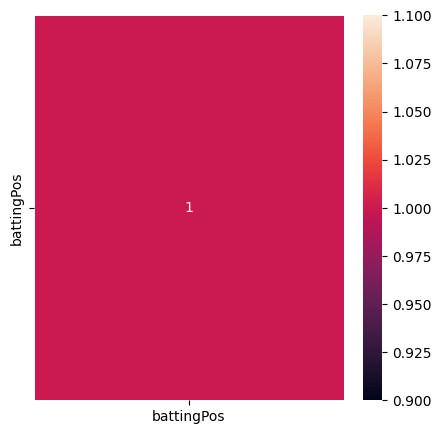

In [76]:
# changing all columns into number type
numeric_data = batting_data.select_dtypes(include=['number'])
corr = numeric_data.corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True,linewidths=.5)
plt.show()


In [77]:
batting_data= batting_data.drop(columns='dismissal')
batting_data.head(10)

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not out
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,out
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,out
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,not_out
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,out
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis†,6,6,0,0,100.00,out


In [78]:
#batting_data["match_id"] = batting_data["match"].map(match_ids_dict)
#batting_data.head()

In [79]:
batting_data["new_match_id"] = batting_data["match"]
batting_data.head(10)

#match_ids_dict["IndiaVsPakistan"]# single match id

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not out,new_match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,Namibia Vs Sri Lanka
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,Namibia Vs Sri Lanka
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,Namibia Vs Sri Lanka
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,Namibia Vs Sri Lanka
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,Namibia Vs Sri Lanka
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,out,Namibia Vs Sri Lanka
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,out,Namibia Vs Sri Lanka
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,not_out,Namibia Vs Sri Lanka
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,out,Namibia Vs Sri Lanka
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis†,6,6,0,0,100.00,out,Namibia Vs Sri Lanka


In [80]:
batting_data['new_match_id'] = data_match['match_id']
batting_data.head()


,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not out,new_match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1825
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1826
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1828
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1830


In [81]:
batting_data.to_csv('/content/fact_bating_summary.csv',index=False)

**BOWLING SUMMARY**

In [82]:
with open('/content/cricket_wc_bowling_summary.json') as f:
    data = json.load (f)
data[0]['bowlingSummary']

[{'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Maheesh Theekshana',
  'overs': '4',
  'maiden': '0',
  'runs': '23',
  'wickets': '1',
  'economy': '5.75',
  '0s': '7',
  '4s': '0',
  '6s': '0',
  'wides': '2',
  'noBalls': '0'},
 {'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Dushmantha Chameera',
  'overs': '4',
  'maiden': '0',
  'runs': '39',
  'wickets': '1',
  'economy': '9.75',
  '0s': '6',
  '4s': '3',
  '6s': '1',
  'wides': '2',
  'noBalls': '0'},
 {'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Pramod Madushan',
  'overs': '4',
  'maiden': '0',
  'runs': '37',
  'wickets': '2',
  'economy': '9.25',
  '0s': '6',
  '4s': '3',
  '6s': '1',
  'wides': '0',
  'noBalls': '0'},
 {'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Chamika Karunaratne',
  'overs': '4',
  'maiden': '0',
  'runs': '36',
  'wickets': '1',
  'economy': '9.00',
  '0s': '7',
  

In [83]:
bowling_data = pd.DataFrame(data[0]['bowlingSummary'])
bowling_data.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0


In [84]:
bowling_data.shape

(11, 13)

In [85]:
whole_match =[]
for i in data:
    whole_match.extend(i['bowlingSummary'])

In [92]:
whole_match

[{'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Maheesh Theekshana',
  'overs': '4',
  'maiden': '0',
  'runs': '23',
  'wickets': '1',
  'economy': '5.75',
  '0s': '7',
  '4s': '0',
  '6s': '0',
  'wides': '2',
  'noBalls': '0'},
 {'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Dushmantha Chameera',
  'overs': '4',
  'maiden': '0',
  'runs': '39',
  'wickets': '1',
  'economy': '9.75',
  '0s': '6',
  '4s': '3',
  '6s': '1',
  'wides': '2',
  'noBalls': '0'},
 {'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Pramod Madushan',
  'overs': '4',
  'maiden': '0',
  'runs': '37',
  'wickets': '2',
  'economy': '9.25',
  '0s': '6',
  '4s': '3',
  '6s': '1',
  'wides': '0',
  'noBalls': '0'},
 {'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Chamika Karunaratne',
  'overs': '4',
  'maiden': '0',
  'runs': '36',
  'wickets': '1',
  'economy': '9.00',
  '0s': '7',
  

In [97]:
bowling_data = pd.DataFrame(whole_match)
bowling_data.tail()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
495,Pakistan Vs England,Pakistan,Naseem Shah,4,0,30,0,7.50,15,3,1,1,0
496,Pakistan Vs England,Pakistan,Haris Rauf,4,0,23,2,5.75,13,3,0,1,0
497,Pakistan Vs England,Pakistan,Shadab Khan,4,0,20,1,5.00,10,1,0,0,0
498,Pakistan Vs England,Pakistan,Mohammad Wasim,4,0,38,1,9.50,5,5,0,2,0
499,Pakistan Vs England,Pakistan,Iftikhar Ahmed,0.5,0,13,0,15.60,0,1,1,0,0


In [98]:
bowling_data["new_match_id"] = bowling_data["match"]
bowling_data.tail(10)

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,new_match_id
490,Pakistan Vs England,England,Sam Curran,4,0,12,3,3.00,15,0,0,0,0,Pakistan Vs England
491,Pakistan Vs England,England,Adil Rashid,4,1,22,2,5.50,10,1,0,1,0,Pakistan Vs England
492,Pakistan Vs England,England,Chris Jordan,4,0,27,2,6.75,9,3,0,0,0,Pakistan Vs England
493,Pakistan Vs England,England,Liam Livingstone,1,0,16,0,16.00,1,1,1,1,0,Pakistan Vs England
494,Pakistan Vs England,Pakistan,Shaheen Shah Afridi,2.1,0,13,1,6.00,6,1,0,0,0,Pakistan Vs England
495,Pakistan Vs England,Pakistan,Naseem Shah,4,0,30,0,7.50,15,3,1,1,0,Pakistan Vs England
496,Pakistan Vs England,Pakistan,Haris Rauf,4,0,23,2,5.75,13,3,0,1,0,Pakistan Vs England
497,Pakistan Vs England,Pakistan,Shadab Khan,4,0,20,1,5.00,10,1,0,0,0,Pakistan Vs England
498,Pakistan Vs England,Pakistan,Mohammad Wasim,4,0,38,1,9.50,5,5,0,2,0,Pakistan Vs England
499,Pakistan Vs England,Pakistan,Iftikhar Ahmed,0.5,0,13,0,15.60,0,1,1,0,0,Pakistan Vs England


In [99]:
bowling_data['new_match_id'] = data_match['match_id']
bowling_data.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,new_match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0,T20I # 1825
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0,T20I # 1826
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0,T20I # 1828
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0,T20I # 1830


In [89]:
bowling_data.to_csv('/content/fact_bowling_summary.csv',index=False)

**PLAYER INFORMATION**

In [122]:
with open('/content/cricket_wc_player_info.json') as f:
   data= json.load(f)
data



[{'name': 'Michael van Lingen',
  'team': 'Namibia',
  'battingStyle': 'Left hand Bat',
  'bowlingStyle': 'Left arm Medium',
  'playingRole': 'Bowling Allrounder',
  'description': ''},
 {'name': 'Divan la Cock',
  'team': 'Namibia',
  'battingStyle': 'Right hand Bat',
  'bowlingStyle': 'Legbreak',
  'playingRole': 'Opening Batter',
  'description': ''},
 {'name': 'Jan Nicol Loftie-Eaton',
  'team': 'Namibia',
  'battingStyle': 'Left hand Bat',
  'bowlingStyle': 'Right arm Medium, Legbreak',
  'playingRole': 'Batter',
  'description': ''},
 {'name': 'Stephan Baard',
  'team': 'Namibia',
  'battingStyle': 'Right hand Bat',
  'bowlingStyle': 'Right arm Medium fast',
  'playingRole': 'Batter',
  'description': ''},
 {'name': 'Gerhard Erasmus(c)',
  'team': 'Namibia',
  'battingStyle': 'Right hand Bat',
  'bowlingStyle': 'Right arm Offbreak',
  'playingRole': 'Allrounder',
  'description': ''},
 {'name': 'Jan Frylinck',
  'team': 'Namibia',
  'battingStyle': 'Left hand Bat',
  'bowlingStyl

In [123]:
player_data = pd.DataFrame(data)
player_data.head()





,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,


In [124]:
player_data.shape

(219, 6)

In [128]:
player_data[player_data['team']=='India']

,name,team,battingStyle,bowlingStyle,playingRole,description
127,KL Rahul,India,Right hand Bat,,Opening Batter,"A tall, elegant right-hand batsman who can kee..."
128,Rohit Sharma(c),India,Right hand Bat,Right arm Offbreak,Top order Batter,"Languid and easy on the eye, Rohit Sharma owne..."
129,Virat Kohli,India,Right hand Bat,Right arm Medium,Top order Batter,India has given to the world many a great cric...
130,Suryakumar Yadav,India,Right hand Bat,"Right arm Medium, Right arm Offbreak",Batter,Hard-hitting 360-degree batter Suryakumar Yada...
131,Axar Patel,India,Left hand Bat,Slow Left arm Orthodox,Bowling Allrounder,Left-arm spinner Axar Patel has been increasin...
132,Hardik Pandya,India,Right hand Bat,Right arm Medium fast,Allrounder,Hardik Pandya swears by living life king size ...
133,Dinesh Karthik†,India,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,Not many would forget the sight of Dinesh Kart...
134,Ravichandran Ashwin,India,Right hand Bat,Right arm Offbreak,Bowling Allrounder,R Ashwin took the tricks and skills he learned...
135,Bhuvneshwar Kumar,India,Right hand Bat,Right arm Medium,Bowler,"At the time of his India debut in 2012, Bhuvne..."
136,Arshdeep Singh,India,Left hand Bat,Left arm Medium fast,Bowler,


In [129]:
player_data.to_csv('/content/dim_players_no_images.csv',index=False)